In [9]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
movie_csv = pd.read_csv('2013_movies.csv')
movie_csv.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [4]:
movie_csv['ReleaseDate'] = pd.to_datetime(movie_csv['ReleaseDate'])
movie_csv.dtypes

Title                         object
Budget                       float64
DomesticTotalGross             int64
Director                      object
Rating                        object
Runtime                        int64
ReleaseDate           datetime64[ns]
dtype: object

In [121]:
#movie_csv.head()

# Challenge 1

In [67]:
dtg_plot= movie_csv.groupby('ReleaseDate').sum()['DomesticTotalGross'].sort_index()

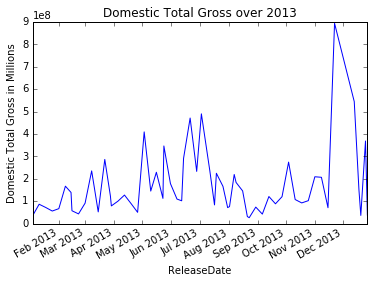

In [121]:
dtg_plot.plot()
plt.ylabel('Domestic Total Gross in Millions')
plt.title('Domestic Total Gross over 2013')

# Challenge 2

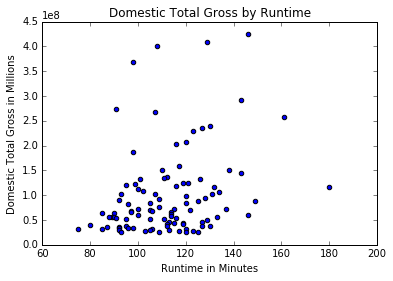

In [120]:
plt.scatter(x = movie_csv['Runtime'], y = movie_csv['DomesticTotalGross'])
plt.ylabel('Domestic Total Gross in Millions')
plt.xlabel('Runtime in Minutes')
plt.title('Domestic Total Gross by Runtime')

# Challenge 3

In [126]:
gb_rating = movie_csv[['Rating', 'Runtime', 'DomesticTotalGross', 'ReleaseDate']]
print('Average Domestic Total Gross by Rating:')
print(gb_rating.groupby('Rating').mean()['DomesticTotalGross'])
print('\n')
print('Runtime by Rating:')
print(gb_rating.groupby('Rating').mean()['Runtime'])

Average Domestic Total Gross by Rating:
Rating
G        2.684928e+08
PG       1.311357e+08
PG-13    1.114498e+08
R        6.989243e+07
Name: DomesticTotalGross, dtype: float64


Runtime by Rating:
Rating
G        107.000000
PG        99.933333
PG-13    117.510638
R        110.729730
Name: Runtime, dtype: float64


# Challenge #4

In [332]:
rate_rel = movie_csv[['Rating', 'DomesticTotalGross', 'ReleaseDate']]
rate_rel['ReleaseDate'] = pd.to_datetime(rate_rel['ReleaseDate'])
PG = rate_rel[rate_rel['Rating'] == 'PG']
PG13 = rate_rel[rate_rel['Rating'] == 'PG-13']
R = rate_rel[rate_rel['Rating'] == 'R']
G = rate_rel[rate_rel['Rating'] == 'G']

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


/Users/sunkuo/anaconda/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


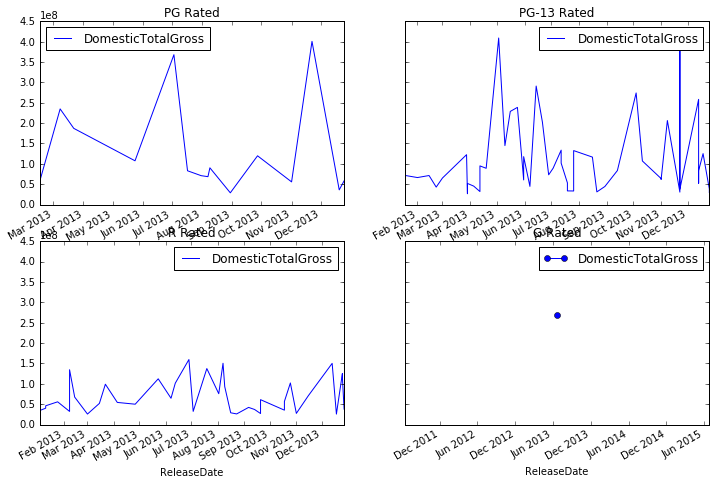

In [333]:
fig, axs = plt.subplots(2,2, sharey=True)
pg_plot = PG.plot(x="ReleaseDate", y="DomesticTotalGross", ax=axs[0,0], figsize=(12,8))
pg_plot.set_title('PG Rated')
pg13_plot = PG13.plot(x="ReleaseDate", y="DomesticTotalGross", ax=axs[0,1])
pg13_plot.set_title('PG-13 Rated')
r_plot = R.plot(x="ReleaseDate", y="DomesticTotalGross", ax=axs[1,0])
r_plot.set_title('R Rated')
g_plot = G.plot(marker = 'o', x="ReleaseDate", y="DomesticTotalGross", ax=axs[1,1])
g_plot.set_title('G Rated')

# Challenge #5

In [159]:
directors = movie_csv.groupby('Director')
print('Top 5 Directors with highest Gross per Movie:')
print(directors['DomesticTotalGross'].mean().sort_values(ascending = False).head())

Top 5 Directors with highest Gross per Movie:
Director
Francis Lawrence             424668047
Shane Black                  409013994
Chris BuckJennifer Lee       400738009
Pierre CoffinChris Renaud    368061265
Zack Snyder                  291045518
Name: DomesticTotalGross, dtype: int64


# Challenge #6

In [119]:
movie_csv['ReleaseDate'] = pd.to_datetime(movie_csv['ReleaseDate'])
#movie_csv.dtypes

In [49]:
DTG_month = movie_csv[[ 'DomesticTotalGross', 'ReleaseDate']]
#DTG_month

In [95]:
DTG_month['ReleaseDate'] = pd.to_datetime(DTG_month['ReleaseDate'])
DTG_month['ReleaseMonth'] = DTG_month['ReleaseDate'].dt.month

/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sunkuo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [122]:
DTG_m = DTG_month[['ReleaseMonth', 'DomesticTotalGross']]
#DTG_m.plot(kind = 'bar', x = 'ReleaseMonth', y = 'DomesticTotalGross')
DTG_mo = DTG_m.groupby('ReleaseMonth').mean()['DomesticTotalGross']
print(DTG_m.head())
#DTG_mo.plot(kind = 'bar')

   ReleaseMonth  DomesticTotalGross
0            11           424668047
1             5           409013994
2            11           400738009
3             7           368061265
4             6           291045518


In [117]:
DTG_std = DTG_m.copy()
DTG_freq = DTG_m.copy()
DTG_std = DTG_std.groupby('ReleaseMonth').std()['DomesticTotalGross']

In [115]:
DTG_freq = DTG_m.copy()
DTG_freq = DTG_freq.groupby('ReleaseMonth').count()['DomesticTotalGross']
DTG_freq = np.sqrt(DTG_freq)

In [116]:
DTG_s = DTG_std.div(DTG_freq)

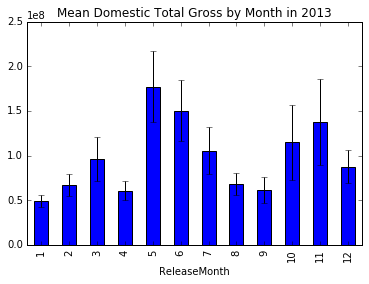

In [120]:
plt = DTG_mo.plot(kind = 'bar', yerr = DTG_s)
plt.set_title('Mean Domestic Total Gross by Month in 2013')